In [2]:
%matplotlib inline

In [3]:
from __future__ import division

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from vtk_rw import read_vtk, write_vtk
import nibabel as nb

/home/raid3/huntenburg/workspace/anaconda2/envs/myelinconnect/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [5]:
rh_tsnr_min_file='/scr/ilz3/myelinconnect/all_data_on_simple_surf/masks/rh_tsnr_min.npy'
rh_snr_min_file='/scr/ilz3/myelinconnect/all_data_on_simple_surf/masks/rh_inv2prob_min.npy'#
rh_mask_file='/scr/ilz3/myelinconnect/all_data_on_simple_surf/masks/rh_medial_wall.npy'
rh_mesh='/scr/ilz3/myelinconnect/all_data_on_simple_surf/surfs/lowres_rh_d.vtk'
rh_sulc_file='/scr/ilz3/myelinconnect/all_data_on_simple_surf/surfs/lowres_rh_d_sulc.npy'


lh_tsnr_min_file='/scr/ilz3/myelinconnect/all_data_on_simple_surf/masks/lh_tsnr_min.npy'
lh_snr_min_file='/scr/ilz3/myelinconnect/all_data_on_simple_surf/masks/lh_inv2prob_min.npy'
lh_mask_file='/scr/ilz3/myelinconnect/all_data_on_simple_surf/masks/lh_medial_wall.npy'
lh_mesh='/scr/ilz3/myelinconnect/all_data_on_simple_surf/surfs/lowres_lh_d.vtk'
lh_sulc_file='/scr/ilz3/myelinconnect/all_data_on_simple_surf/surfs/lowres_lh_d_sulc.npy'

In [6]:
rh_tsnr_min=np.load(rh_tsnr_min_file)
rh_snr_min=np.load(rh_snr_min_file)
rh_mask=np.load(rh_mask_file)
rh_sulc=np.load(rh_sulc_file)
rv, rf, rd = read_vtk(rh_mesh)

In [7]:
lh_tsnr_min=np.load(lh_tsnr_min_file)
lh_snr_min=np.load(lh_snr_min_file)
lh_mask=np.load(lh_mask_file)
lh_sulc=np.load(lh_sulc_file)
lv, lf, ld = read_vtk(lh_mesh)

In [8]:
from plotting import plot_surf_stat_map
sns.set_context('notebook', font_scale=1.5)

### tsnr mask

In [9]:
rh_tsnr_masked = np.delete(rh_tsnr_min,rh_mask)
lh_tsnr_masked = np.delete(lh_tsnr_min,lh_mask)

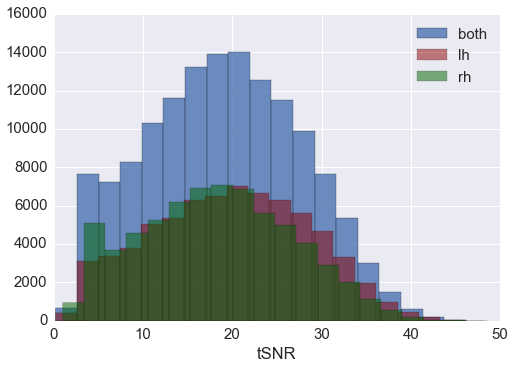

In [10]:
sns.set_style('darkgrid')
plt.hist(np.concatenate((lh_tsnr_masked, rh_tsnr_masked)), label='both', alpha=0.8, bins=20)
plt.hist(lh_tsnr_masked, label='lh', color='darkred', alpha=0.5, bins=20)
plt.hist(rh_tsnr_masked, label='rh', color='darkgreen', alpha=0.5, bins=20)
plt.legend()
plt.xlabel('tSNR')

In [11]:
std_tsnr = np.std(np.concatenate((lh_tsnr_masked, rh_tsnr_masked)))
mean_tsnr = np.mean(np.concatenate((lh_tsnr_masked, rh_tsnr_masked)))

In [12]:
print std_tsnr
print mean_tsnr
print mean_tsnr-std_tsnr
print mean_tsnr-1.5*std_tsnr
print mean_tsnr-2*std_tsnr

8.66206224999
19.0083000852
10.3462378352
6.01520671019
1.6841755852


In [13]:
rh_tsnr_min[rh_mask]=0
lh_tsnr_min[lh_mask]=0

#### 1 SDV

/home/raid3/huntenburg/workspace/anaconda2/envs/myelinconnect/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


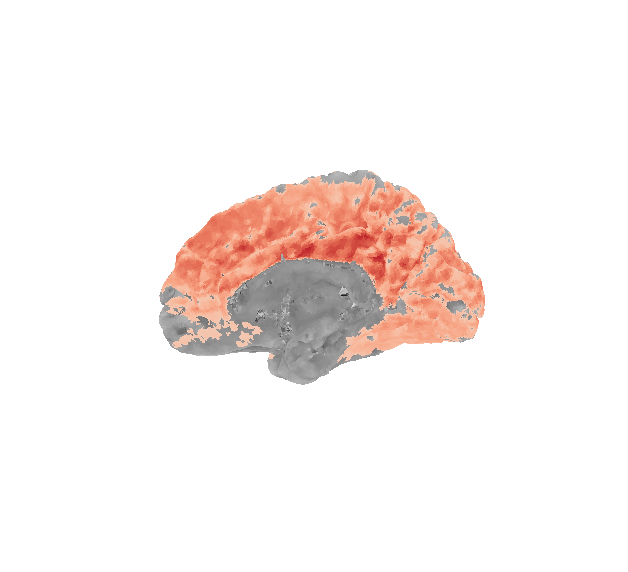

In [14]:
sns.set_style('white')
tplot = plot_surf_stat_map(rv, rf, stat_map=rh_tsnr_min, threshold=mean_tsnr-std_tsnr, bg_map=rh_sulc, elev=180, azim=180, figsize=(11,10))

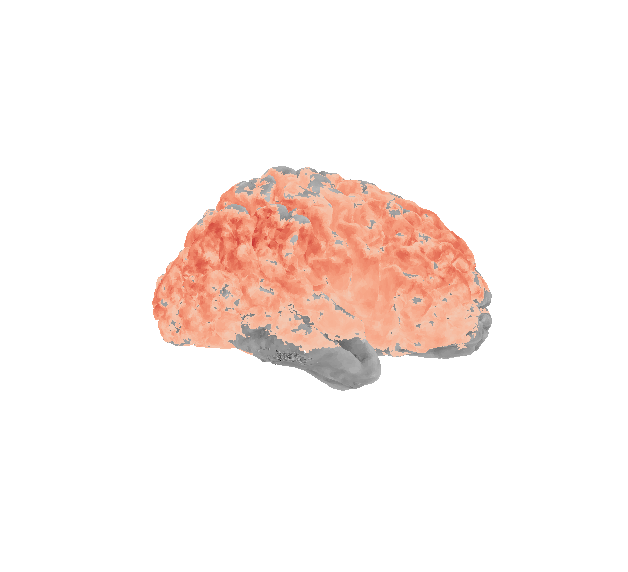

In [15]:
sns.set_style('white')
tplot = plot_surf_stat_map(rv, rf, stat_map=rh_tsnr_min, threshold=mean_tsnr-std_tsnr, bg_map=rh_sulc, elev=180, azim=0, figsize=(11,10))

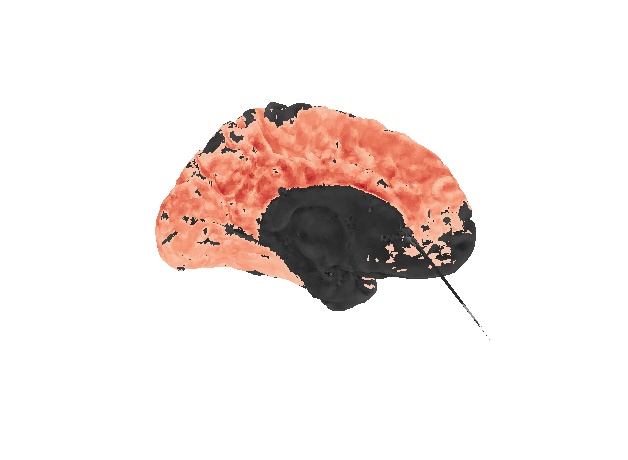

In [17]:
sns.set_style('white')
tplot = plot_surf_stat_map(lv, lf, stat_map=lh_tsnr_min, threshold=mean_tsnr-std_tsnr, bg_map=lh_sulc, elev=180, azim=0, figsize=(11,8))

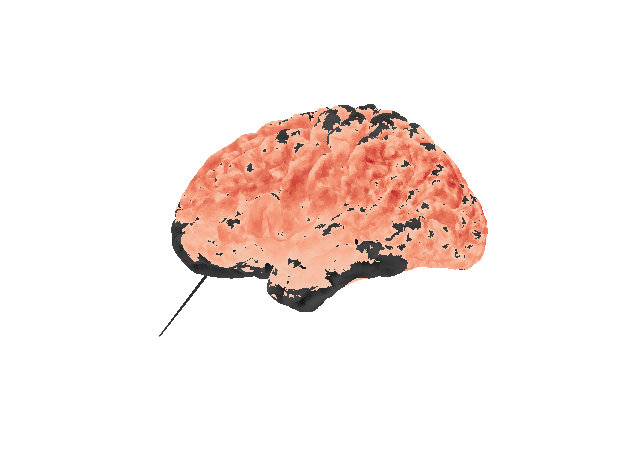

In [18]:
sns.set_style('white')
tplot = plot_surf_stat_map(lv, lf, stat_map=lh_tsnr_min, threshold=mean_tsnr-std_tsnr, bg_map=lh_sulc, elev=180, azim=180, figsize=(11,8))

#### 2 SDV

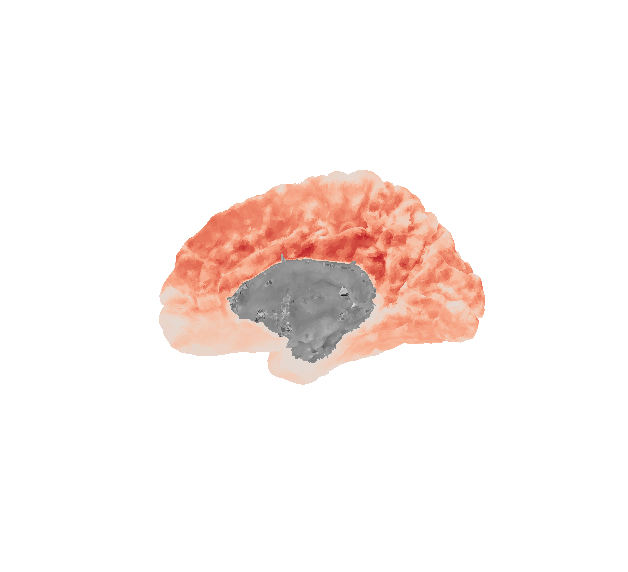

In [19]:
sns.set_style('white')
tplot = plot_surf_stat_map(rv, rf, stat_map=rh_tsnr_min, threshold=mean_tsnr-2*std_tsnr, bg_map=rh_sulc, elev=180, azim=180, figsize=(11,10))

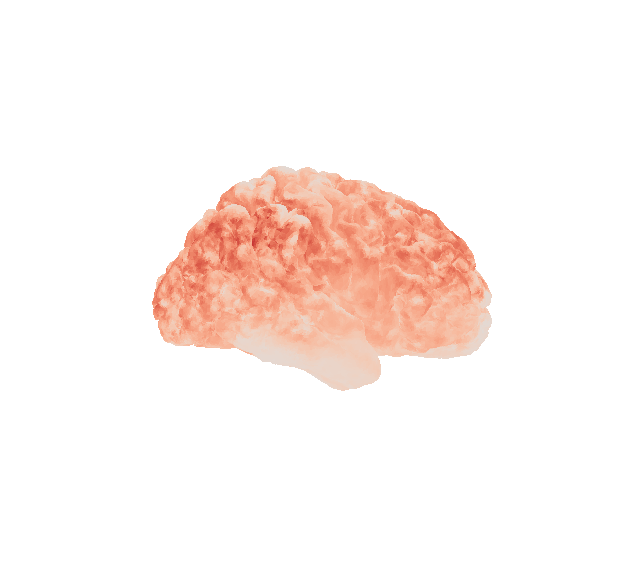

In [20]:
sns.set_style('white')
tplot = plot_surf_stat_map(rv, rf, stat_map=rh_tsnr_min, threshold=mean_tsnr-2*std_tsnr, bg_map=rh_sulc, elev=180, azim=0, figsize=(11,10))

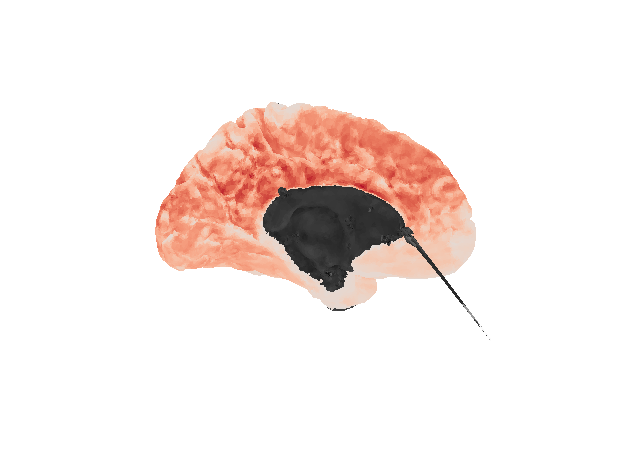

In [21]:
sns.set_style('white')
tplot = plot_surf_stat_map(lv, lf, stat_map=lh_tsnr_min, threshold=mean_tsnr-2*std_tsnr, bg_map=lh_sulc, elev=180, azim=0, figsize=(11,8))

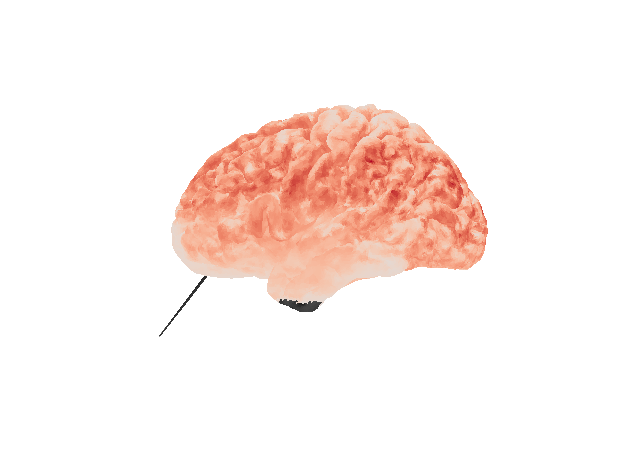

In [22]:
sns.set_style('white')
tplot = plot_surf_stat_map(lv, lf, stat_map=lh_tsnr_min, threshold=mean_tsnr-2*std_tsnr, bg_map=lh_sulc, elev=180, azim=180, figsize=(11,8))

#### 1.5 SDV

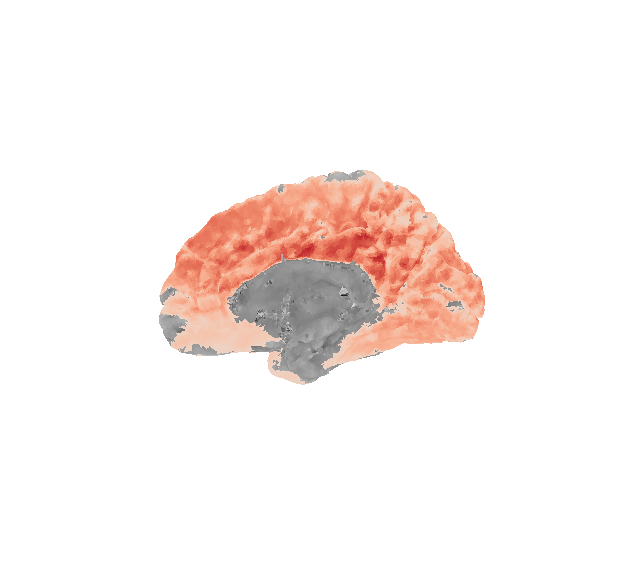

In [23]:
sns.set_style('white')
tplot = plot_surf_stat_map(rv, rf, stat_map=rh_tsnr_min, threshold=mean_tsnr-1.5*std_tsnr, bg_map=rh_sulc, elev=180, azim=180, figsize=(11,10))

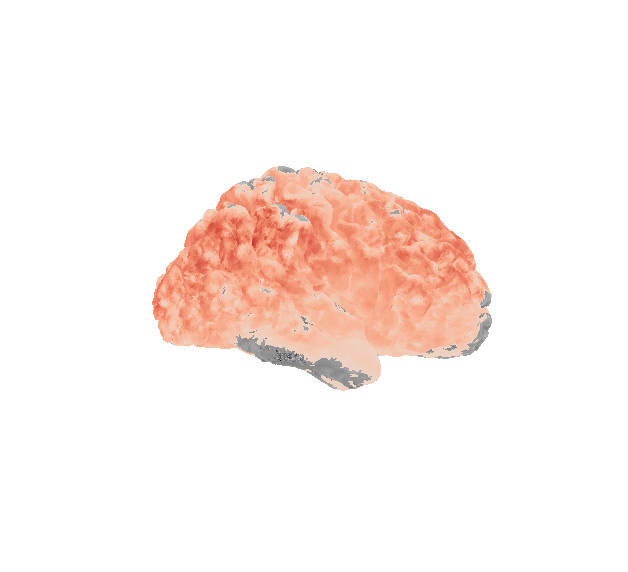

In [24]:
sns.set_style('white')
tplot = plot_surf_stat_map(rv, rf, stat_map=rh_tsnr_min, threshold=mean_tsnr-1.5*std_tsnr, bg_map=rh_sulc, elev=180, azim=0, figsize=(11,10))

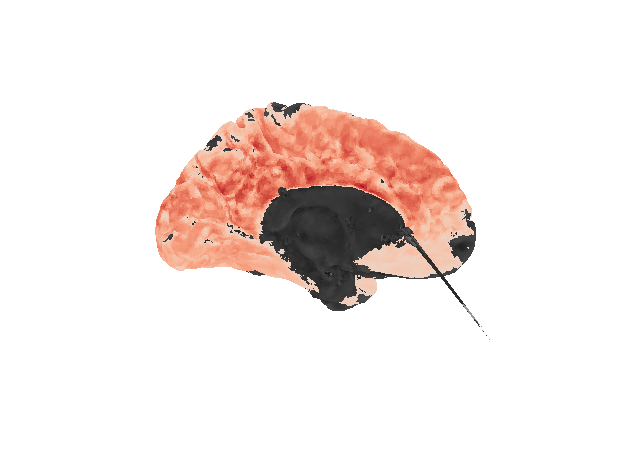

In [25]:
sns.set_style('white')
tplot = plot_surf_stat_map(lv, lf, stat_map=lh_tsnr_min, threshold=mean_tsnr-1.5*std_tsnr, bg_map=lh_sulc, elev=180, azim=0, figsize=(11,8))

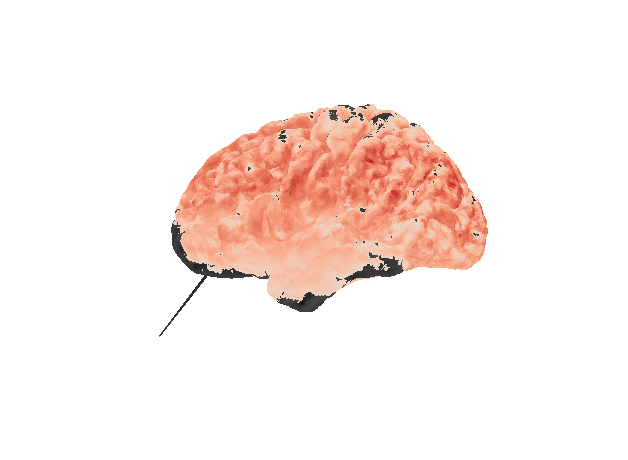

In [26]:
sns.set_style('white')
tplot = plot_surf_stat_map(lv, lf, stat_map=lh_tsnr_min, threshold=mean_tsnr-1.5*std_tsnr, bg_map=lh_sulc, elev=180, azim=180, figsize=(11,8))

### INV2 prob mask

In [27]:
rh_snr_masked = np.delete(rh_snr_min,rh_mask)
lh_snr_masked = np.delete(lh_snr_min,lh_mask)

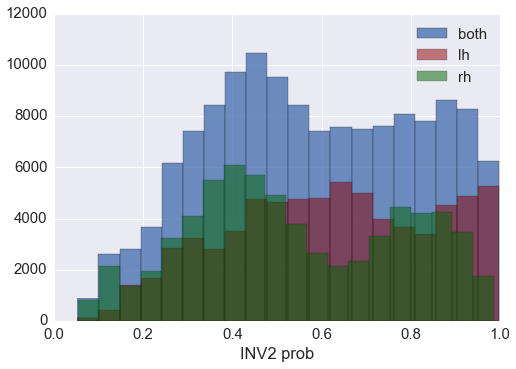

In [28]:
sns.set_style('darkgrid')
plt.hist(np.concatenate((lh_snr_masked, rh_snr_masked)), label='both', alpha=0.8, bins=20)
plt.hist(lh_snr_masked, label='lh', color='darkred', alpha=0.5, bins=20)
plt.hist(rh_snr_masked, label='rh', color='darkgreen', alpha=0.5, bins=20)
plt.legend()
plt.xlabel('INV2 prob')

In [29]:
std_snr = np.std(np.concatenate((lh_snr_masked, rh_snr_masked)))
mean_snr = np.mean(np.concatenate((lh_snr_masked, rh_snr_masked)))

In [30]:
print std_snr
print mean_snr
print mean_snr-std_snr
print mean_snr-1.5*std_snr
print mean_snr-2*std_snr

0.234693967899
0.582566338472
0.347872370574
0.230525386624
0.113178402675


In [31]:
rh_snr_min[rh_mask]=0
lh_snr_min[lh_mask]=0

#### 1 SDV

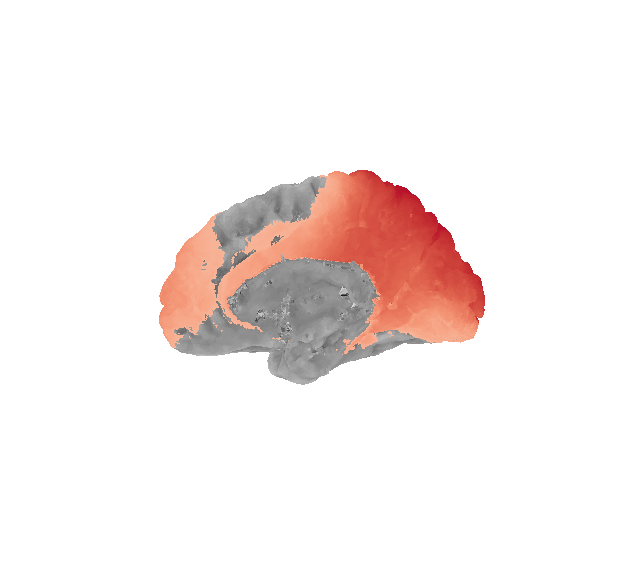

In [32]:
sns.set_style('white')
tplot = plot_surf_stat_map(rv, rf, stat_map=rh_snr_min, threshold=mean_snr-std_snr, bg_map=rh_sulc, elev=180, azim=180, figsize=(11,10))

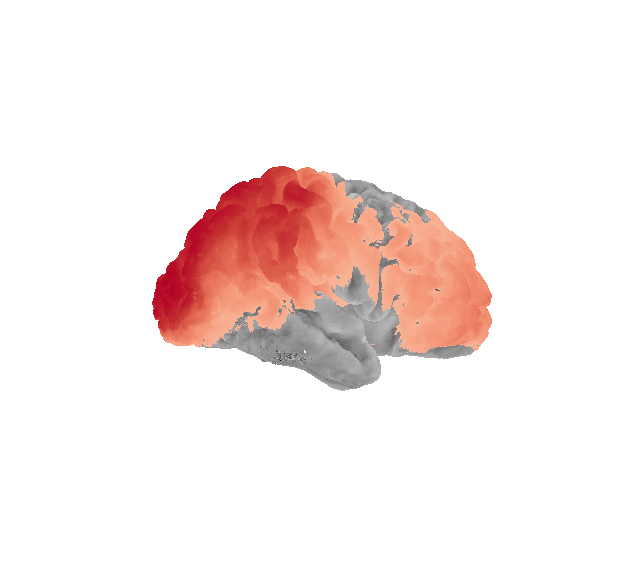

In [33]:
sns.set_style('white')
tplot = plot_surf_stat_map(rv, rf, stat_map=rh_snr_min, threshold=mean_snr-std_snr, bg_map=rh_sulc, elev=180, azim=0, figsize=(11,10))

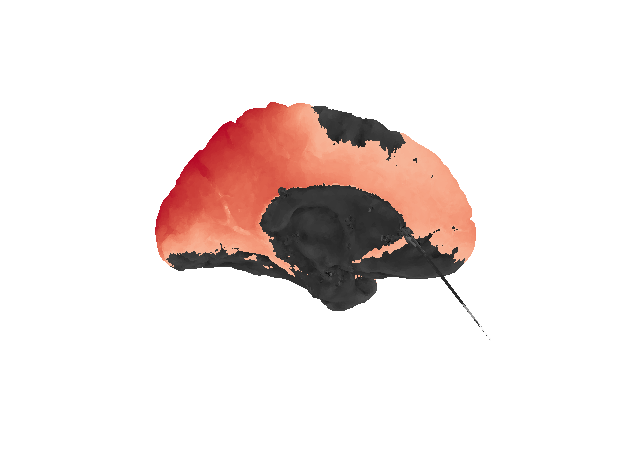

In [34]:
sns.set_style('white')
tplot = plot_surf_stat_map(lv, lf, stat_map=lh_snr_min, threshold=mean_snr-std_snr, bg_map=lh_sulc, elev=180, azim=0, figsize=(11,8))

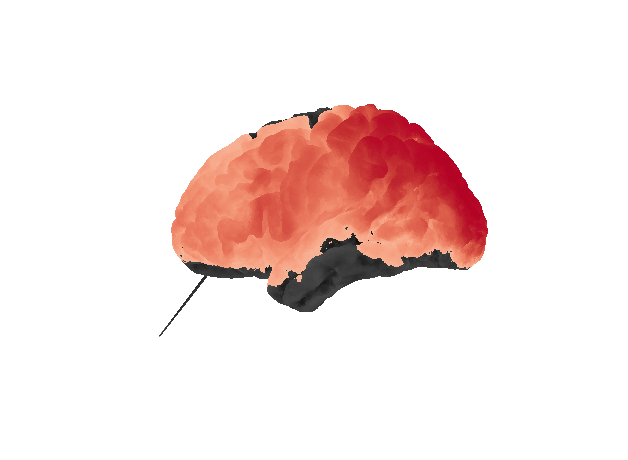

In [35]:
sns.set_style('white')
tplot = plot_surf_stat_map(lv, lf, stat_map=lh_snr_min, threshold=mean_snr-std_snr, bg_map=lh_sulc, elev=180, azim=180, figsize=(11,8))

#### 2 SDV

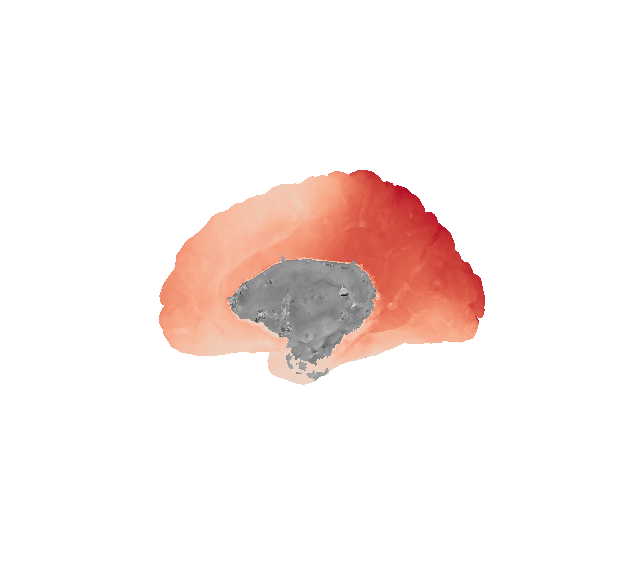

In [37]:
sns.set_style('white')
tplot = plot_surf_stat_map(rv, rf, stat_map=rh_snr_min, threshold=mean_snr-2*std_snr, bg_map=rh_sulc, elev=180, azim=180, figsize=(11,10))

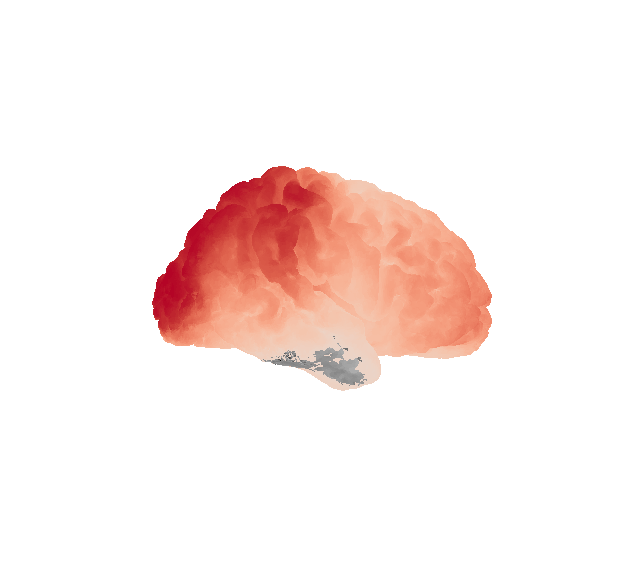

In [38]:
sns.set_style('white')
tplot = plot_surf_stat_map(rv, rf, stat_map=rh_snr_min, threshold=mean_snr-2*std_snr, bg_map=rh_sulc, elev=180, azim=0, figsize=(11,10))

ERROR! Session/line number was not unique in database. History logging moved to new session 1751


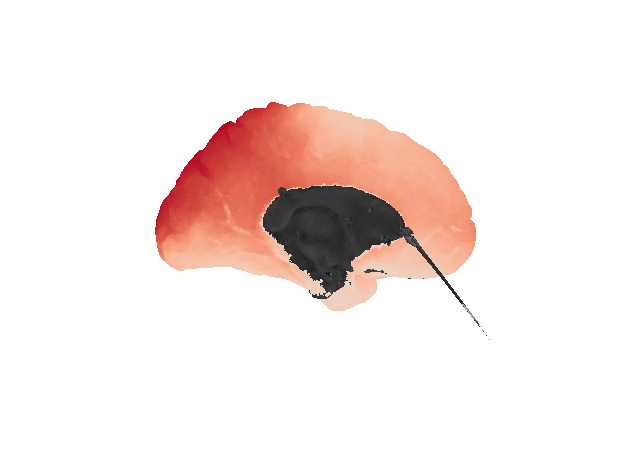

In [39]:
sns.set_style('white')
tplot = plot_surf_stat_map(lv, lf, stat_map=lh_snr_min, threshold=mean_snr-2*std_snr, bg_map=lh_sulc, elev=180, azim=0, figsize=(11,8))

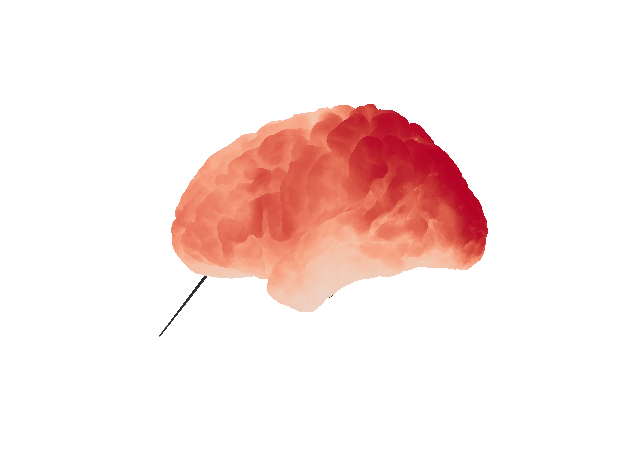

In [40]:
sns.set_style('white')
tplot = plot_surf_stat_map(lv, lf, stat_map=lh_snr_min, threshold=mean_snr-2*std_snr, bg_map=lh_sulc, elev=180, azim=180, figsize=(11,8))

#### 1.5 SDV

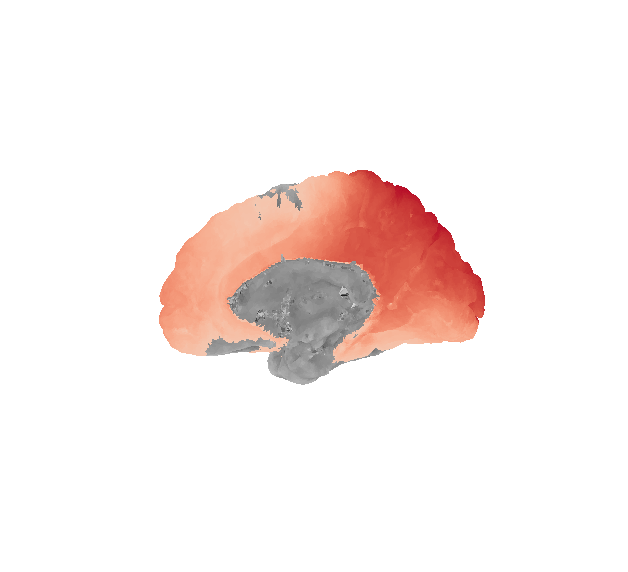

In [41]:
sns.set_style('white')
tplot = plot_surf_stat_map(rv, rf, stat_map=rh_snr_min, threshold=mean_snr-1.5*std_snr, bg_map=rh_sulc, elev=180, azim=180, figsize=(11,10))

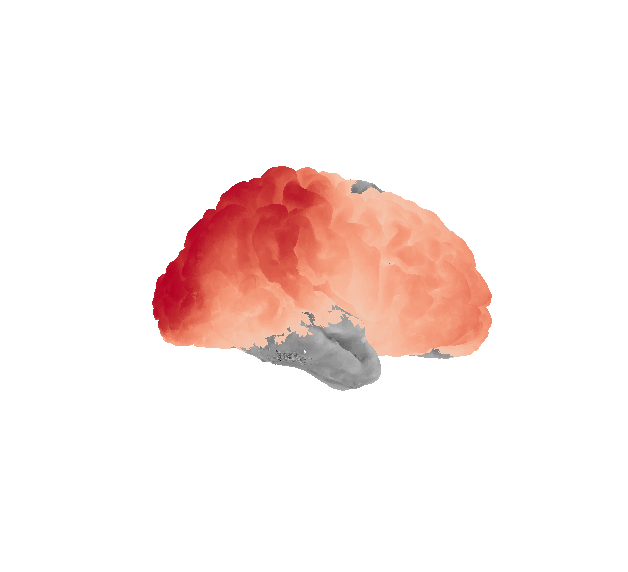

In [42]:
sns.set_style('white')
tplot = plot_surf_stat_map(rv, rf, stat_map=rh_snr_min, threshold=mean_snr-1.5*std_snr, bg_map=rh_sulc, elev=180, azim=0, figsize=(11,10))

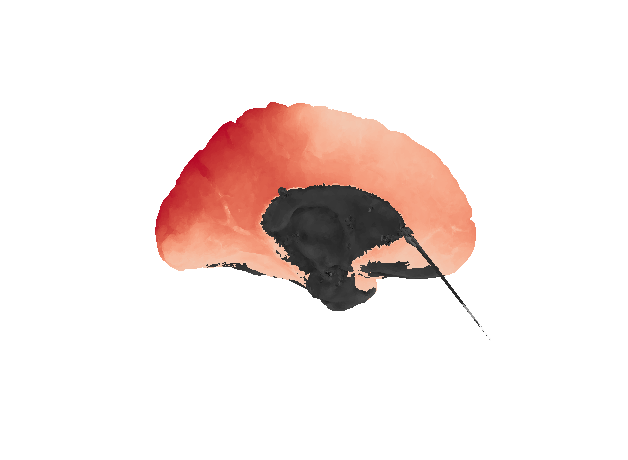

In [43]:
sns.set_style('white')
tplot = plot_surf_stat_map(lv, lf, stat_map=lh_snr_min, threshold=mean_snr-1.5*std_snr, bg_map=lh_sulc, elev=180, azim=0, figsize=(11,8))

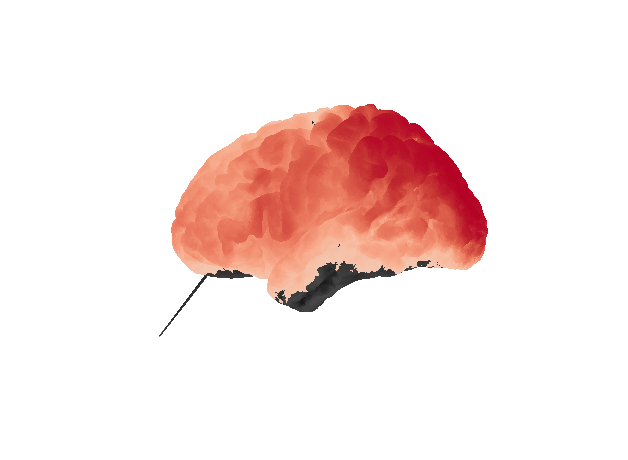

In [44]:
sns.set_style('white')
tplot = plot_surf_stat_map(lv, lf, stat_map=lh_snr_min, threshold=mean_snr-1.5*std_snr, bg_map=lh_sulc, elev=180, azim=180, figsize=(11,8))

### combined mask

In [51]:
rh_mask = np.unique(np.concatenate((np.where(rh_tsnr_min<=mean_tsnr-1.5*std_tsnr)[0],
                                    np.where(rh_snr_min<=mean_snr-1.5*std_snr)[0])))

In [52]:
lh_mask = np.unique(np.concatenate((np.where(lh_tsnr_min<=mean_tsnr-1.5*std_tsnr)[0],
                                    np.where(lh_snr_min<=mean_snr-1.5*std_snr)[0])))

In [54]:
rh_mask_plot = np.zeros_like(rh_snr_min)
rh_mask_plot[rh_mask] = 1

In [57]:
lh_mask_plot = np.zeros_like(lh_snr_min)
lh_mask_plot[lh_mask] = 1

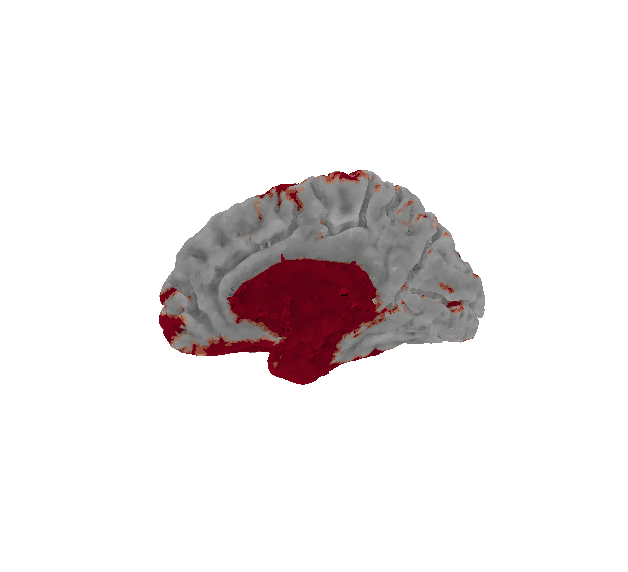

In [56]:
sns.set_style('white')
plot = plot_surf_stat_map(rv, rf, stat_map=rh_mask_plot, bg_map=rh_sulc, bg_on_stat=True, elev=180, azim=180, figsize=(11,10))

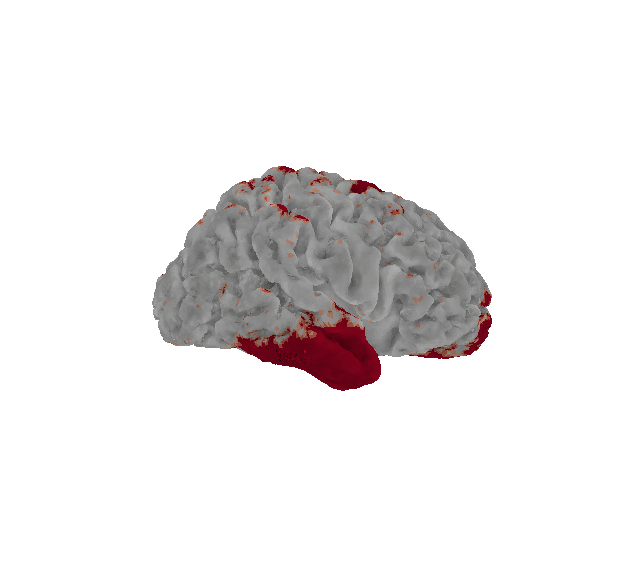

In [58]:
sns.set_style('white')
plot = plot_surf_stat_map(rv, rf, stat_map=rh_mask_plot, bg_map=rh_sulc, bg_on_stat=True,elev=180, azim=0, figsize=(11,10))

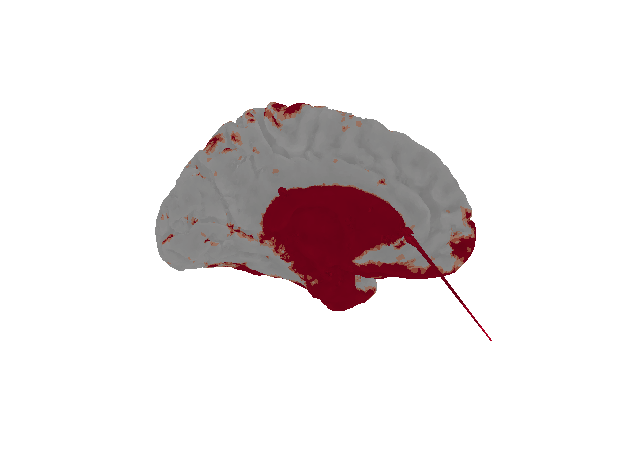

In [63]:
sns.set_style('white')
tplot = plot_surf_stat_map(lv, lf, stat_map=lh_mask_plot, bg_map=lh_sulc, bg_on_stat=True, darkness=0.5, elev=180, azim=0, figsize=(11,8))

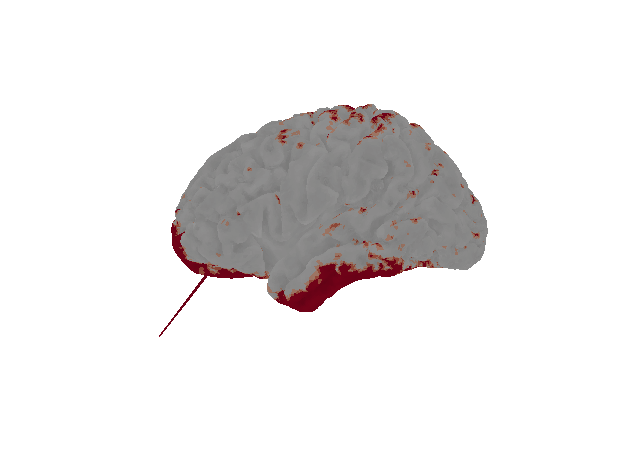

In [64]:
sns.set_style('white')
tplot = plot_surf_stat_map(lv, lf, stat_map=lh_mask_plot, bg_map=lh_sulc, bg_on_stat=True, darkness=0.5, elev=180, azim=180, figsize=(11,8))

In [61]:
np.save('/scr/ilz3/myelinconnect/all_data_on_simple_surf/masks/rh_fullmask.npy', rh_mask)

In [62]:
np.save('/scr/ilz3/myelinconnect/all_data_on_simple_surf/masks/lh_fullmask.npy', lh_mask)